In [2]:
import perceval as pcvl
import numpy as np
from perceval.algorithm import Sampler
from perceval.components import PS, BS

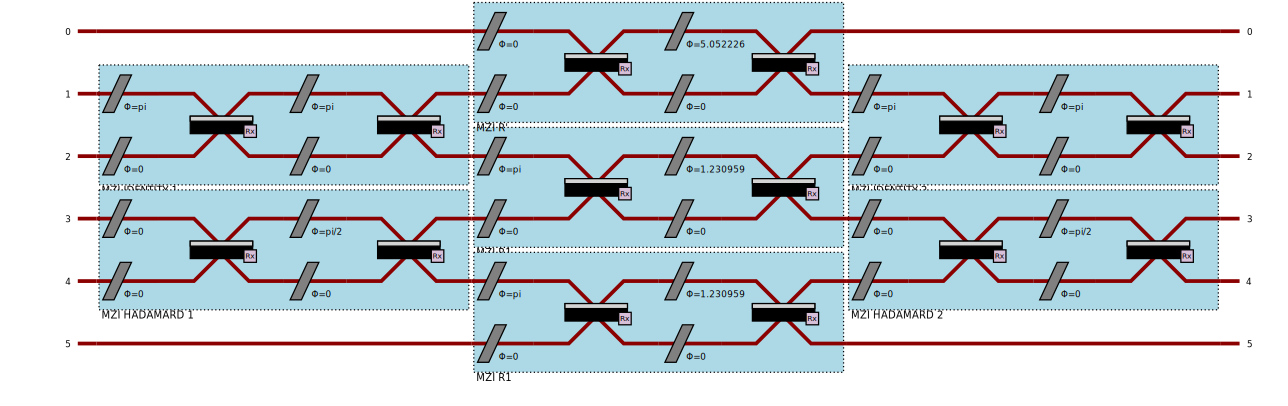

In [15]:
identity_mzi_1 = (
    pcvl.Circuit(2, name="MZI Identity 1")
    .add(0,PS(phi=np.pi))
    .add(1,PS(phi=0))
    .add(0, BS())
    .add(0,PS(phi=np.pi))
    .add(1,PS(phi=0))
    .add(0, BS())
)

hadamard_mzi_1 = (
    pcvl.Circuit(2, name="MZI Hadamard 1")
    .add(0,PS(phi=0))
    .add(1,PS(phi=0))
    .add(0, BS())
    .add(0,PS(phi=np.pi/2))
    .add(1,PS(phi=0))
    .add(0, BS())
)

identity_mzi_2 = (
    pcvl.Circuit(2, name="MZI Identity 2")
    .add(0,PS(phi=np.pi))
    .add(1,PS(phi=0))
    .add(0, BS())
    .add(0,PS(phi=np.pi))
    .add(1,PS(phi=0))
    .add(0, BS())
)

hadamard_mzi_2 = (
    pcvl.Circuit(2, name="MZI Hadamard 2")
    .add(0,PS(phi=0))
    .add(1,PS(phi=0))
    .add(0, BS())
    .add(0,PS(phi=np.pi/2))
    .add(1,PS(phi=0))
    .add(0, BS())
)

identity_r_1 = (
    pcvl.Circuit(2, name="MZI R1")
    .add(0,PS(phi=np.pi)) # Phi
    .add(1,PS(phi=0))
    .add(0, BS())
    .add(0,PS(phi=2 * np.arcsin(1/np.sqrt(3)))) # Theta
    .add(1,PS(phi=0))
    .add(0, BS())
)

identity_r_2 = (
    pcvl.Circuit(2, name="MZI R2")
    .add(0,PS(phi=np.pi)) # Phi
    .add(1,PS(phi=0))
    .add(0, BS())
    .add(0,PS(phi=2 * np.arcsin(1/np.sqrt(3)))) # Theta
    .add(1,PS(phi=0))
    .add(0, BS())
)

identity_r_l = (
    pcvl.Circuit(2, name="MZI R'")
    .add(0,PS(phi=0)) # Phi
    .add(1,PS(phi=0))
    .add(0, BS())
    .add(0,PS(phi=-2 * np.arcsin(1/np.sqrt(3)))) # Theta
    .add(1,PS(phi=0))
    .add(0, BS())
)

chip = (pcvl.Circuit(6)
              .add(1, identity_mzi_1, merge=False)
              .add(3, hadamard_mzi_1, merge=False)

              .add(2, identity_r_1, merge=False)
              .add(4, identity_r_1, merge=False)

              .add(0, identity_r_l, merge=False)

              .add(1, identity_mzi_2, merge=False) 
              .add(3, hadamard_mzi_2, merge=False)
       )

pcvl.pdisplay(chip, recursive=True)

In [22]:
p = pcvl.Processor("SLOS", chip)
p.min_detected_photons_filter(1)
p.compute_physical_logical_perf(True)

p.with_input(pcvl.BasicState([0,1,0,0,1,0]))
sampler = Sampler(p)
probs = sampler.probs()
print(probs['results'])

{
	|0,1,0,0,0,1>: 0.11111111111111112
	|0,1,0,0,1,0>: 0.11111111111111119
	|1,0,0,0,0,1>: 0.22222222222222218
	|0,1,1,0,0,0>: 0.11111111111111116
	|1,0,0,0,1,0>: 0.22222222222222224
	|1,0,1,0,0,0>: 0.22222222222222213
}
